In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

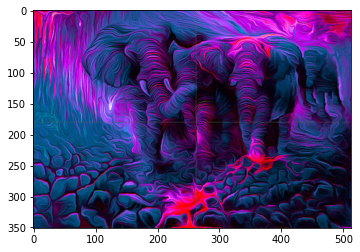

(351, 512, 3)


In [39]:
img = cv2.imread("elephant.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
shape= img.shape
print(shape)

In [40]:
shape_dim= shape[0]*shape[1]
all_pixels = img.reshape((shape_dim , 3))
print(all_pixels.shape)

(179712, 3)


In [41]:
dominant_colors = 2
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=2)

In [42]:
centers = km.cluster_centers_
centers = np.array(centers, dtype = 'uint8')
centers

array([[ 27,  36,  84],
       [142,  40, 176]], dtype=uint8)

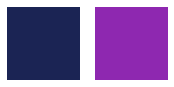

In [43]:
i= 1
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #colors watch
    a = np.zeros((100,100,3), dtype = 'uint8')
    a[:, :, :] = each_col
    plt.imshow(a)
    
plt.show()

# Segmenting Original Image

In [44]:
new_img = np.zeros((img.shape[0]*img.shape[1],3), dtype = 'uint8')
print(new_img.shape)


(179712, 3)


In [45]:
a = km.labels_
print(len(a))

179712


In [46]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape(img.shape)
print(new_img.shape)

(351, 512, 3)


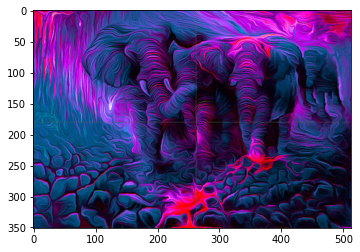

In [47]:
plt.imshow(img)
plt.show()

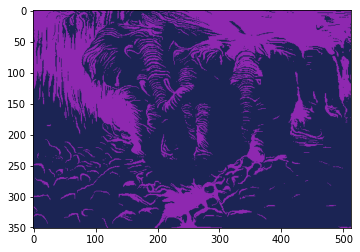

In [48]:
plt.imshow(new_img)
plt.show()